# Classificação (Parte 03)

## Árvore de Decisão (Decision Tree - DT)

Árvores de decisão são métodos de aprendizado supervisonado utilizado para classificação e regressão. O objetivo é a criação de um modelo que prevê o valor de uma variável de _output_ a partir de regras de decisão simples criadas a partir dos dados de entrada.

__Vantagens:__ 

* Fácil de entender e interpretar;

* Praticamente dispensa pré processamento de dados. Outras técnicas frequentemente necessitam de normalização e binarização;

* O custo computacional é de ordem logarítma;

* Lida tanto com dados numéricos como categóricos;

* Capaz de lidar com problemas envolvendo múlitplos outputs;

* Utiliza um modelo "caixa branca". As regras criadas pelo modelo são claras e se baseam em regras booleanas. Por outro lado, um modelo "caixa preta" (e.g. em uma rede neural artifical), os resultados podem ser difíceis de serem interpretados.

__Desvantagens:__

* Alto risco de _overfitting_;

* Árvores de decisão se modificam completamente com pequenas variações nos dados de entrada, tornando-as instáveis;

* O processo de criação de cada ramo é feita resolvendo um problema de otimização combinatório de alta complexidade (NP-Hard). Esse problema faz com que métodos heurísticos sejam utilizados (e.g. greedy search) para a criação dos ramos. Essa categoria de métodos não garantem a otimalidade global;

* Árvores de decisão podem ser tendenciosas para classes dominantes. Dessa forma, faz-se necessário o balanceamento dos dados.

Utilizaremos os dados presentes no arquivo ```exemplo3.csv``` para demonstrar o uso do classificador em questão.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('dados/exemplo3.csv')

X = df.drop('risco', axis=1)
y = df.risco

onehot = OneHotEncoder(sparse=False, drop="first")
X_bin = onehot.fit_transform(X.select_dtypes(include=['object']))

mmscaler = MinMaxScaler()
X_num = mmscaler.fit_transform(X.select_dtypes(exclude=['object']))

X_all = np.append(X_num, X_bin, axis=1)

# Divisão dos conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=1/3, random_state=42)

### Aplicando o classificador Decision Tree

Para aplicar o classifador, faremos a importação da classe ```DecisionTreeClassifier``` presente no subpacote ```sklearn.tree```. 

Parâmetros mais importantes: 

* max_depth: profundidade máxima da árvore;
* max_leaf_nodes: número máximo de folhas. 

In [61]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

accuracy_score(y_test, dt.predict(X_test))

0.7613908872901679

Para acessar a profundidade e o número de folhas utilizamos os comandos ```get_depth()``` e ```get_n_leaves()```, respectivamente.

In [62]:
dt.get_depth()

25

In [63]:
dt.get_n_leaves()

316

Criaremos uma nova árvore de decisão com ```max_depth=14``` e ```max_leaf_nodes=20```.

In [191]:
dt2 = DecisionTreeClassifier(max_depth=14, max_leaf_nodes=20)
dt2.fit(X_train, y_train)

accuracy_score(y_test, dt2.predict(X_test))

0.8369304556354916

O código abaixo permite a visualização da árvore de decisão gerada.

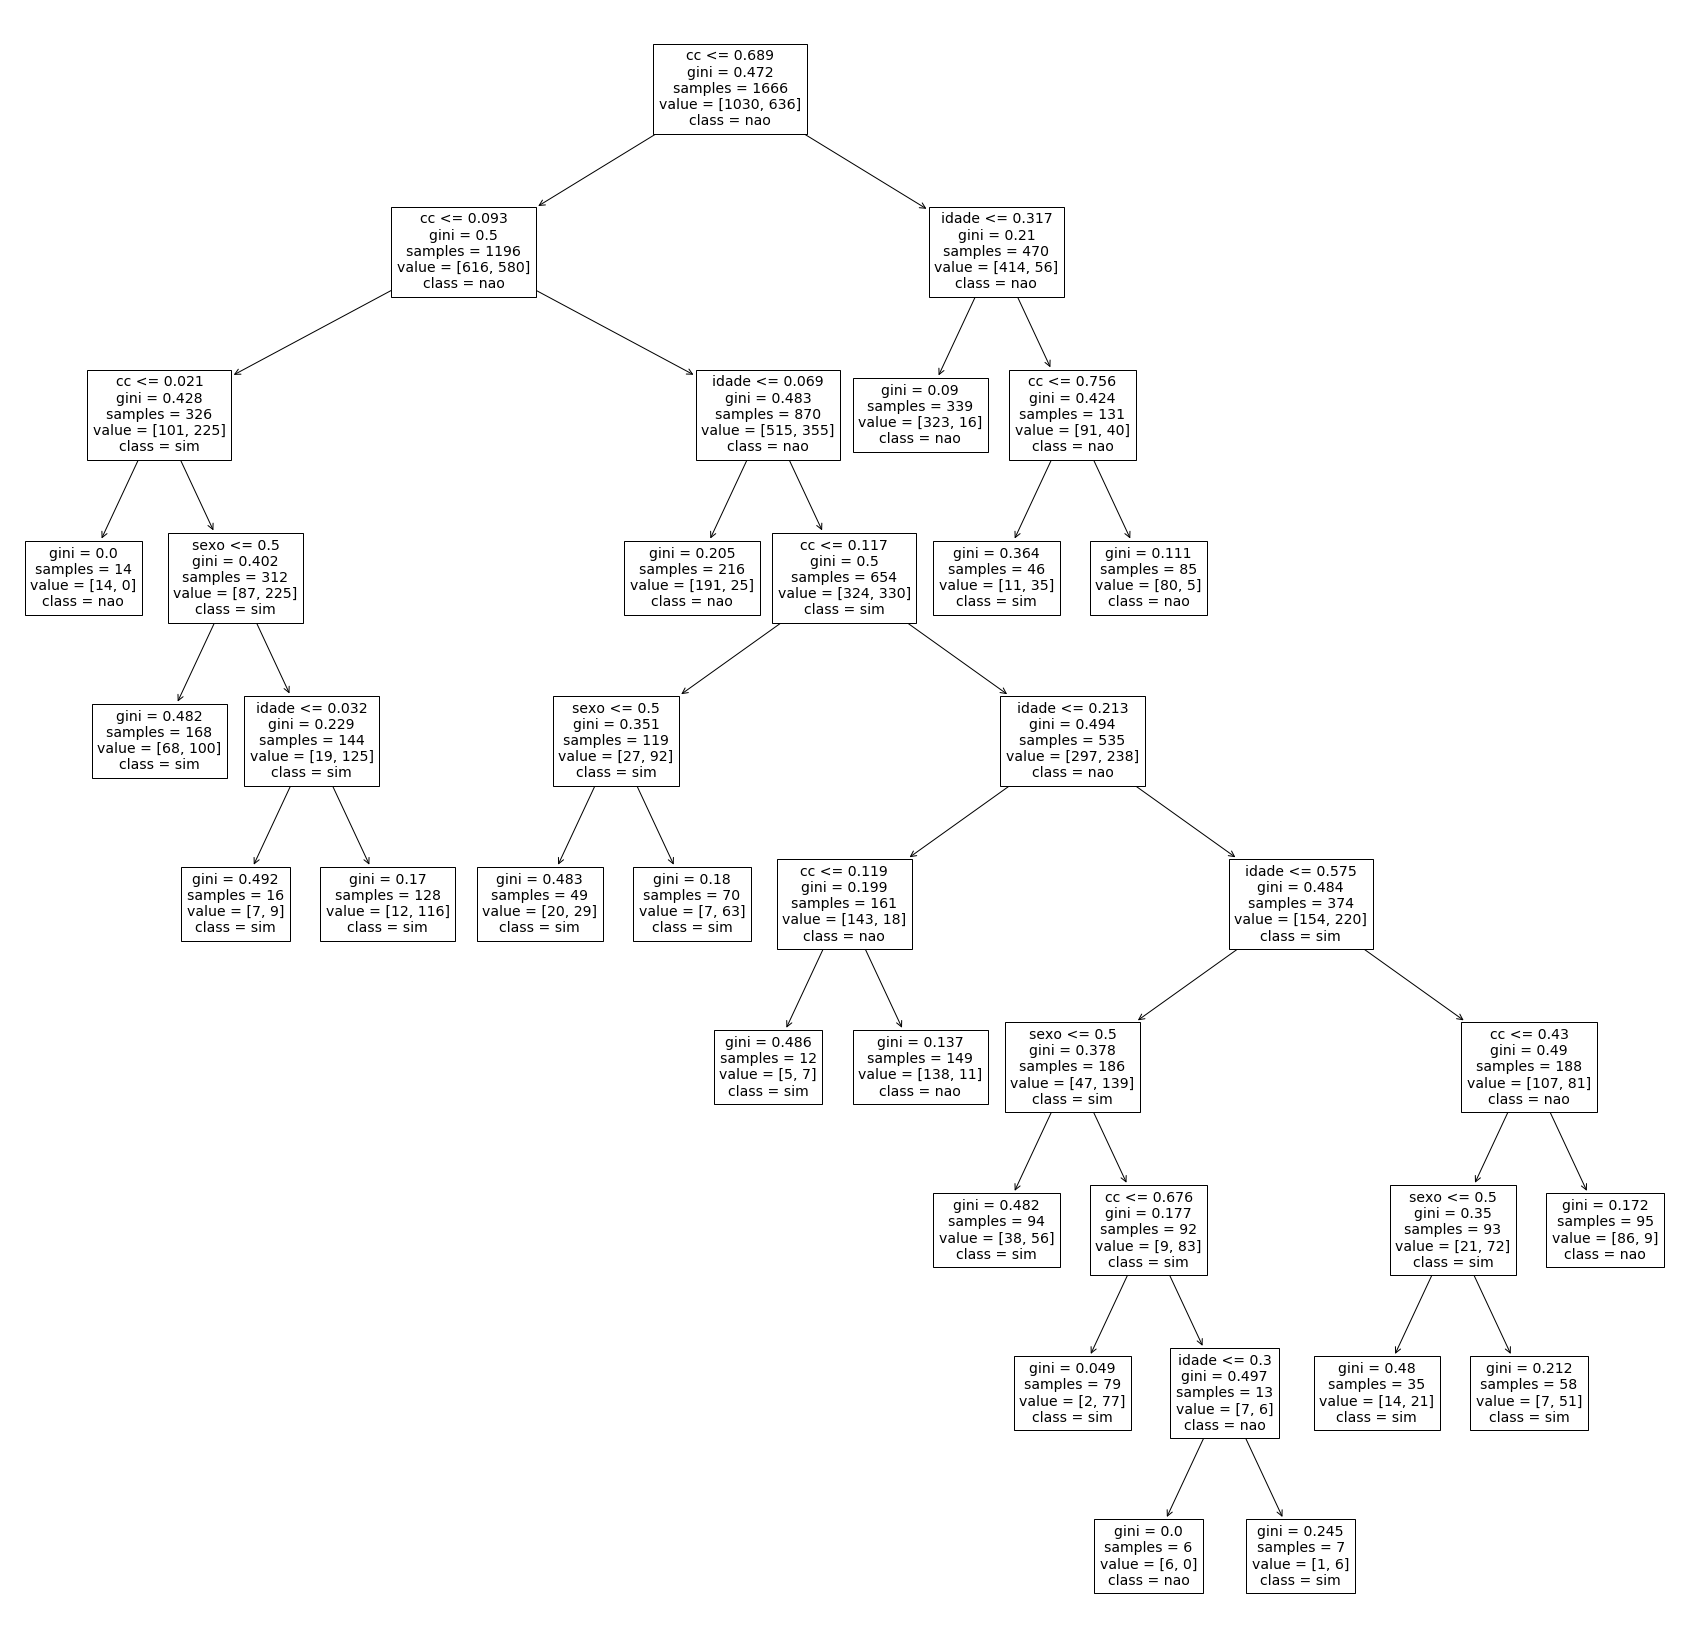

In [192]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))
plot_tree(dt2, feature_names=['idade', 'cc', 'sexo'], class_names=['nao', 'sim'])
plt.show()